In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [34]:
from PIL import Image
import os, glob
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
path = "/content/drive/MyDrive/Github/AIFFEL/Exploration_1/data/scissor"
file_lst = glob.glob(path + "/*.jpg")

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
for file in file_lst:
  origin_file = Image.open(file)
  resized_file = origin_file.resize((28,28),Image.ANTIALIAS)
  resized_file.save(file, "JPEG")

In [35]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
path = "/content/drive/MyDrive/Github/AIFFEL/Exploration_1/data/rock"
file_lst = glob.glob(path + "/*.jpg")

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
for file in file_lst:
  origin_file = Image.open(file)
  resized_file = origin_file.resize((28,28),Image.ANTIALIAS)
  resized_file.save(file, "JPEG")

In [36]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
path = "/content/drive/MyDrive/Github/AIFFEL/Exploration_1/data/paper"
file_lst = glob.glob(path + "/*.jpg")

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
for file in file_lst:
  origin_file = Image.open(file)
  resized_file = origin_file.resize((28,28),Image.ANTIALIAS)
  resized_file.save(file, "JPEG")

In [37]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "/content/drive/MyDrive/Github/AIFFEL/Exploration_1/data/"
(x, y)=load_data(image_dir_path)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.2,
                                                    random_state = 13)
x_train_norm = X_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("x_train shape: {}".format(x_test.shape))
print("y_train shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (240, 28, 28, 3)
y_train shape: (240,)
x_train shape: (60, 28, 28, 3)
y_train shape: (60,)


라벨:  0


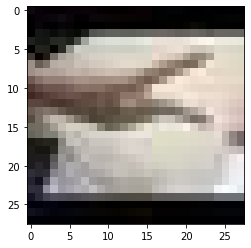

In [38]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [56]:
import tensorflow as tf
from tensorflow import keras

n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
#100: 100개의 이미지,input_shape: 입력이미지의 형태
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
#모델 훈련
model.fit(x_train_norm, y_train, epochs=100)

model.summary()

Epoch 1/100
8/8 [==============================] - 1s 17ms/step - loss: 1.1189 - accuracy: 0.3333
Epoch 2/100
8/8 [==============================] - 0s 15ms/step - loss: 1.1008 - accuracy: 0.3333
Epoch 3/100
8/8 [==============================] - 0s 17ms/step - loss: 1.1011 - accuracy: 0.3000
Epoch 4/100
8/8 [==============================] - 0s 15ms/step - loss: 1.0950 - accuracy: 0.3583
Epoch 5/100
8/8 [==============================] - 0s 17ms/step - loss: 1.0933 - accuracy: 0.4208
Epoch 6/100
8/8 [==============================] - 0s 17ms/step - loss: 1.0912 - accuracy: 0.3917
Epoch 7/100
8/8 [==============================] - 0s 15ms/step - loss: 1.0920 - accuracy: 0.3958
Epoch 8/100
8/8 [==============================] - 0s 17ms/step - loss: 1.0869 - accuracy: 0.4208
Epoch 9/100
8/8 [==============================] - 0s 16ms/step - loss: 1.0846 - accuracy: 0.4167
Epoch 10/100
8/8 [==============================] - 0s 16ms/step - loss: 1.0821 - accuracy: 0.4125
Epoch 11/100
8/8 [=

In [61]:
#모델 시험
x_test_norm = x_test/255.0
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

2/2 - 0s - loss: 1.8239 - accuracy: 0.3167
test_loss: 1.8239465951919556 
test_accuracy: 0.3166666626930237


In [62]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [0.8057281  0.08886229 0.10540972]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  1
